In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [ ]:
dataset_cols = [
'Bike_count',
'Hour',
'Temp',
'Humidity',
'Windspeed',
'Visibility',
'Dew_pt_temp',
'radiation',
'Rainfall',
'Snowfall',
'Func']

In [ ]:
df = pd.read_csv('SeoulBikeData.csv').drop(["Date", "Seasons","Holiday"], axis = 1)
df.columns = dataset_cols

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Func"] = le.fit_transform(df["Func"])

In [ ]:
df = df[df["Hour"] == 12]
df.head()

,Bike_count,Hour,Temp,Humidity,Windspeed,Visibility,Dew_pt_temp,radiation,Rainfall,Snowfall,Func
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [ ]:
df = df.drop(['Hour'], axis = 1)


In [ ]:
df.head()

,Bike_count,Temp,Humidity,Windspeed,Visibility,Dew_pt_temp,radiation,Rainfall,Snowfall,Func
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


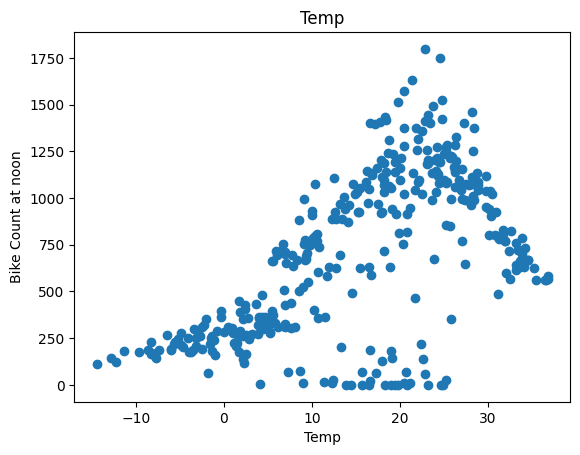

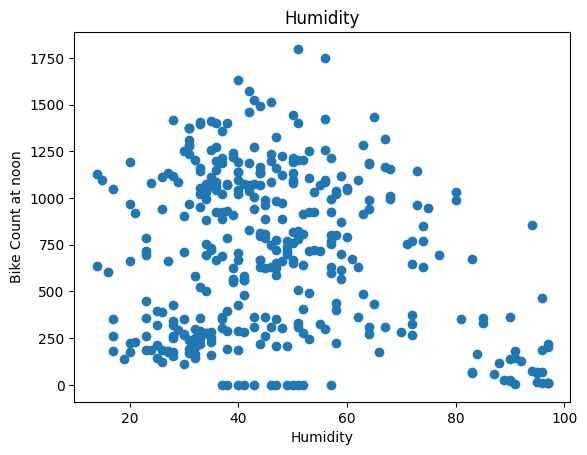

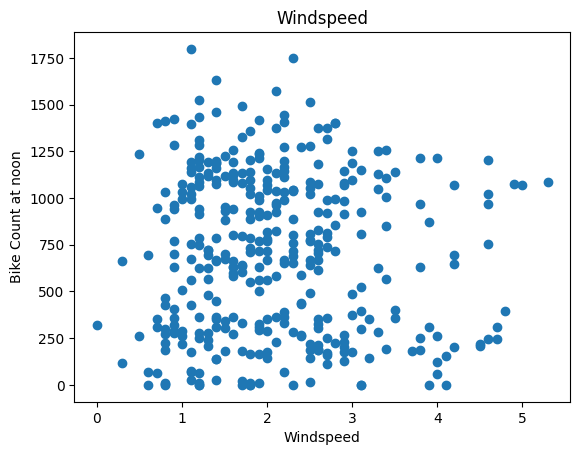

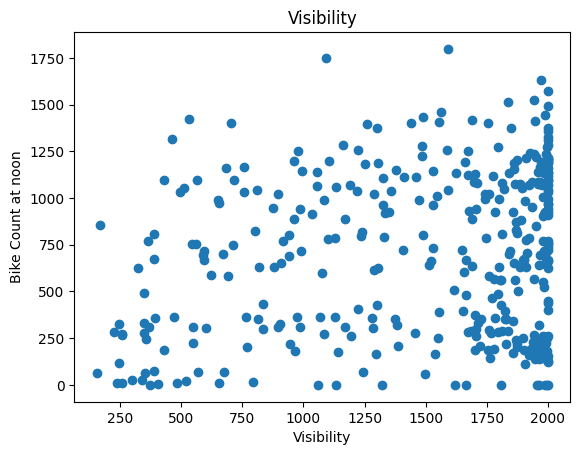

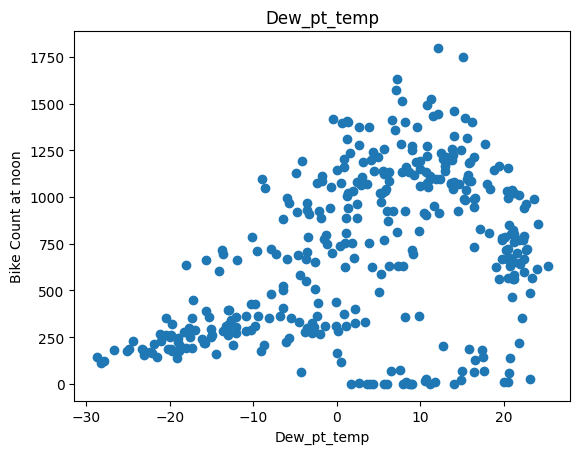

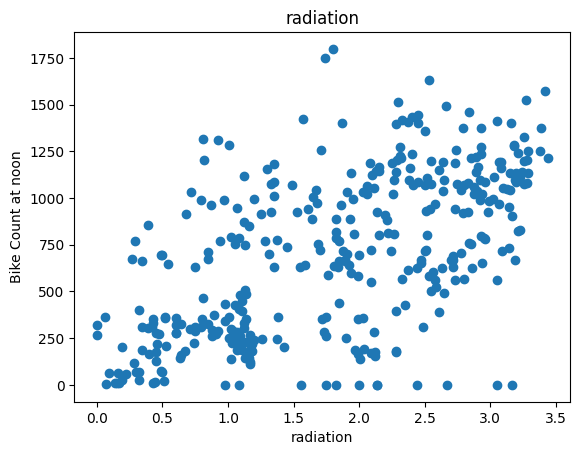

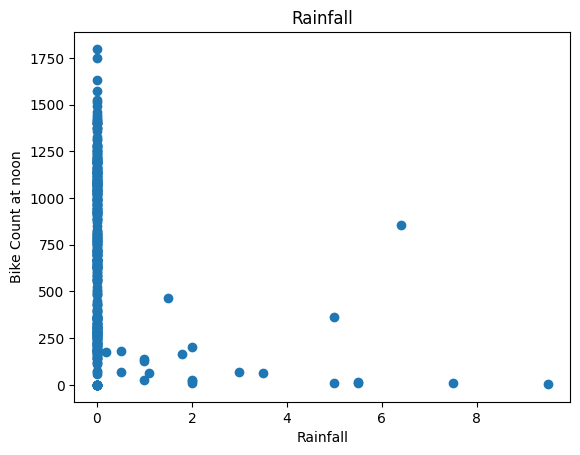

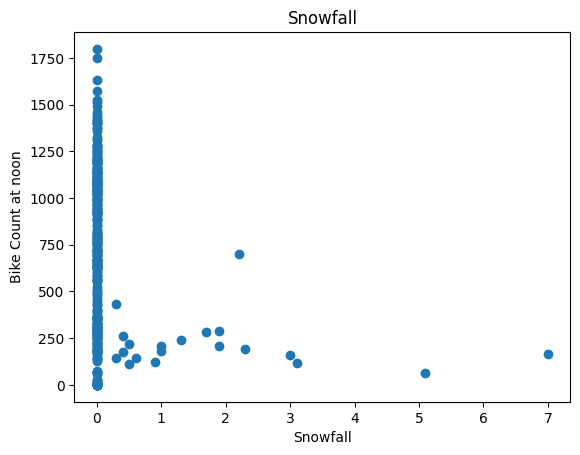

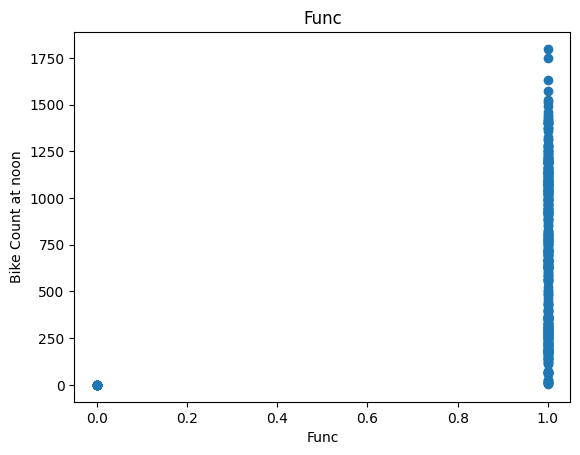

In [ ]:
for label in df.columns[1:] : ##every column after the first one
  plt.scatter(df[label], df["Bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at noon")
  plt.xlabel(label)
  plt.show()

In [ ]:
## Keep track of all the features that arent linear wrt to bike count, will be used in NN later
## Drop non linear relations
df = df.drop(["Windspeed", "Visibility", "Func"], axis = 1)

In [ ]:
df.head()

,Bike_count,Temp,Humidity,Dew_pt_temp,radiation,Rainfall,Snowfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# **TTV**

In [ ]:
train , val , test = np.split(df.sample(frac = 1), [int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
def get_xy(dataframe , y_label, x_label= None):
  dataframe = copy.deepcopy(dataframe)
  if x_label is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values ## taking all features except the one we are predicting
  else:
    if(len(x_label) == 1):
      X = dataframe[x_label[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_label].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data, X, y


In [ ]:
_, X_train_temp, y_train_temp = get_xy(train, "Bike_count", x_label = ["Temp"])
_, X_val_temp, y_val_temp = get_xy(val, "Bike_count", x_label = ["Temp"])
_, X_test_temp, y_test_temp = get_xy(test, "Bike_count", x_label = ["Temp"])


In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [ ]:
print(temp_reg.coef_, temp_reg.intercept_)

[[19.99907725]] [374.79924376]


In [ ]:
temp_reg.score(X_test_temp, y_test_temp) ## Higher the number means more correlation

0.30495854137912726

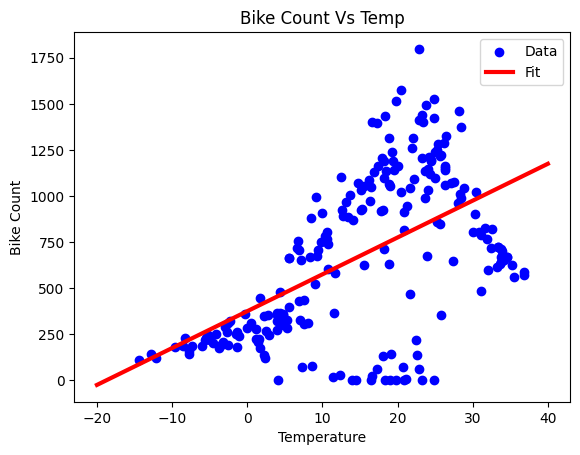

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color = 'blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label = "Fit" , color = "red", linewidth = 3)
plt.legend()
plt.title("Bike Count Vs Temp")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

# Multiple Linear Regression

In [ ]:
df.head()

,Bike_count,Temp,Humidity,Dew_pt_temp,radiation,Rainfall,Snowfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [ ]:
train , val , test = np.split(df.sample(frac = 1), [int(0.6*len(df)),int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "Bike_count", x_label = df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "Bike_count", x_label = df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "Bike_count", x_label = df.columns[1:])


In [ ]:
all_reg = LinearRegression()
all_reg = all_reg.fit(X_train_all, y_train_all)

In [ ]:
all_reg.score(X_test_all, y_test_all)
## As you can see the R^2 score has improved

0.5383582817819983

# **Regression with Neural Net**

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])
## Not adding any activation function and a single dense layer means its linear

In [ ]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'mean_squared_error')

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label = 'loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1),
    y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data =(X_val_temp, y_val_temp)
    )

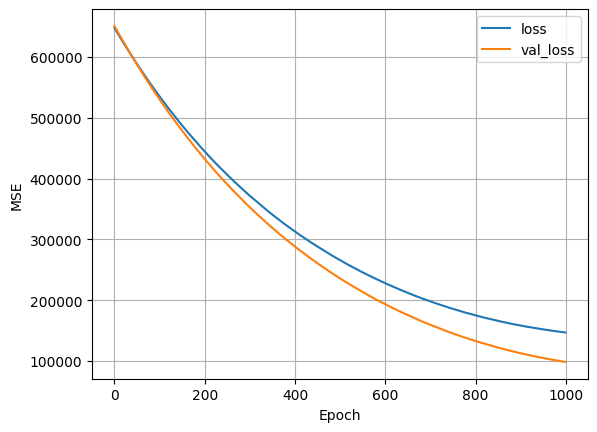

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


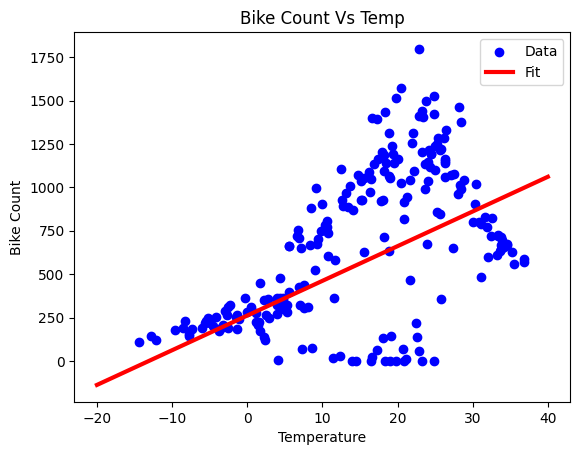

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color = 'blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label = "Fit" , color = "red", linewidth = 3)
plt.legend()
plt.title("Bike Count Vs Temp")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

# **Neural Net**

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [ ]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01) , loss = 'mean_squared_error')

In [ ]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data = (X_val_temp, y_val_temp),
    verbose = 0 , epochs = 200
)

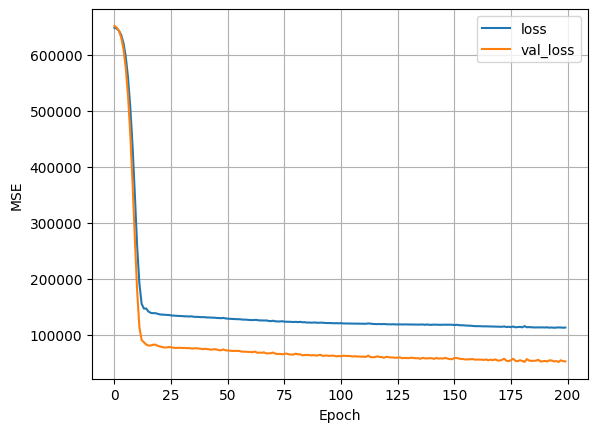

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


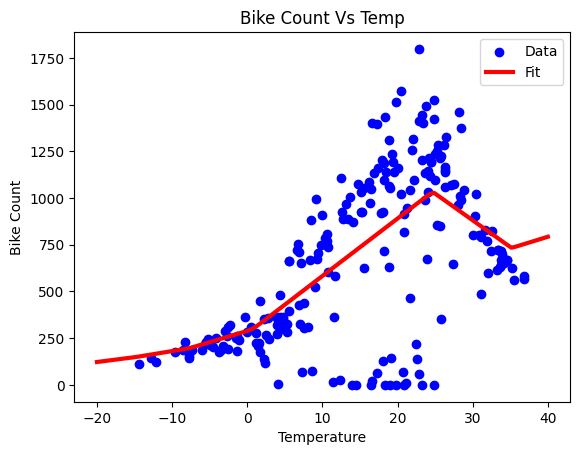

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color = 'blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label = "Fit" , color = "red", linewidth = 3)
plt.legend()
plt.title("Bike Count Vs Temp")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape = (6,), axis = None)
all_normalizer.adapt(X_train_all) ## No need to reshape since its not a single vector of data

In [ ]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) , loss = 'mean_squared_error')

In [ ]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data = (X_val_all, y_val_all),
    verbose=0, epochs=500
)

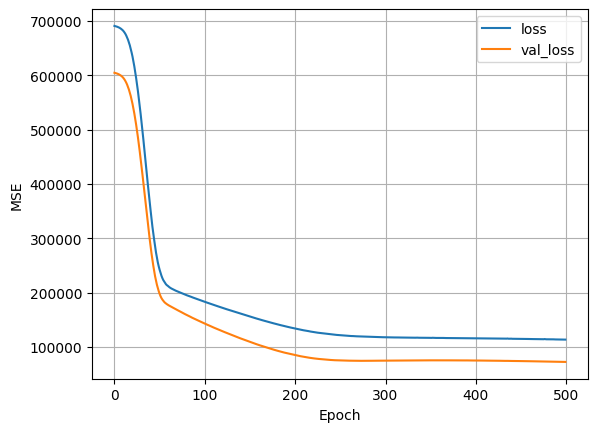

In [ ]:
plot_loss(history)

In [ ]:
#Calculate MSE for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 [==============================] - 0s 3ms/step


In [ ]:
def MSE(y_pred, y_real):
 return  (np.square(y_pred - y_real)).mean()

In [ ]:
MSE(y_pred_lr, y_test_all)

80765.69855853776

In [ ]:
MSE(y_pred_nn , y_test_all)

85906.1312986053

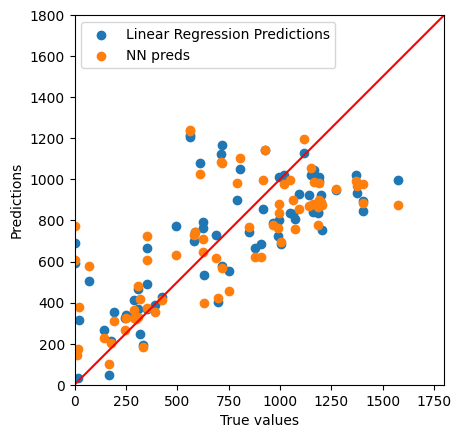

In [ ]:
ax = plt.axes(aspect = "equal")
plt.scatter(y_test_all, y_pred_lr, label = "Linear Regression Predictions")
plt.scatter(y_test_all, y_pred_nn, label = "NN preds")
plt.xlabel("True values")
plt.ylabel("Predictions")
lims = [0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c= "red")